# MAJOR PROJECT
# PREDICTION OF THE COSTS OF USED CARS

  -- by the batch members of ML061B14

## Objective:

Predicting the costs of used cars provided with the data collected from various sources and distributed across various locations in India.

In [52]:
# importing the packages

import numpy as np
from numpy import nan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#Loading the dataset

Car_Dataset = pd.read_excel('Data_Train.xlsx')

# Understading the Dataset


In [54]:
Car_Dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [55]:
#No of rows and columns in the dataframe

Car_Dataset.shape

(6019, 12)

In [56]:
#understanding the column names and datatypes

Car_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB



From the above output, we could infer about the columns names, number of non-null values(Count) and the Datatype of the columns. We could infer that the columns "Mileage , Engine , Power and Seats" have NULL values as the number of non-null values is not equal to the total number of columns present in the dataframe

In [57]:
#description of the original dataset

Car_Dataset.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [58]:
#Understading unique values in the data frame

col = ['Location','Fuel_Type','Transmission','Owner_Type','Seats']
for i in col:
    print(i)
    print(Car_Dataset[i].unique())

Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission
['Manual' 'Automatic']
Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
Seats
[ 5.  7.  8.  4.  6.  2. nan 10.  9.  0.]


# Data Cleansing

In [59]:
#an object type column can contain a mixture of multiple types as below

col = ['Mileage','Engine','Power',]
for i in col:
    print(i)
    print(Car_Dataset[i].apply(type).value_counts())

Mileage
<class 'str'>      6017
<class 'float'>       2
Name: Mileage, dtype: int64
Engine
<class 'str'>      5983
<class 'float'>      36
Name: Engine, dtype: int64
Power
<class 'str'>      5983
<class 'float'>      36
Name: Power, dtype: int64


In [60]:
#converting the format of Mileage

Car_Dataset['Mileage'] = Car_Dataset['Mileage'].replace('kmpl','',regex = True).replace('km/kg','',regex = True)
Car_Dataset['Mileage'] = Car_Dataset['Mileage'].astype(float)
Car_Dataset['Mileage'] = Car_Dataset['Mileage'].replace(0.0,nan,regex = True)

In [61]:
#converting the format of Power

Car_Dataset['Power'] = Car_Dataset['Power'].replace('bhp','',regex = True).replace('null',nan,regex = True)
Car_Dataset['Power'] = Car_Dataset['Power'].astype(float)

In [62]:
#converting the format of Engine

Car_Dataset['Engine'] =Car_Dataset['Engine'].replace('CC','',regex = True)
Car_Dataset['Engine'] = Car_Dataset['Engine'].astype(float)

In [63]:

#converting the format of seats

Car_Dataset['Seats'] = Car_Dataset['Seats'].replace(0.0,nan,regex = True)


In [64]:
#No of NULL values in the columns 

number_Null = {}
col = ['Mileage','Engine','Power','Seats','Fuel_Type','Owner_Type','Transmission']
for i in col:
    number_Null[i] = Car_Dataset[i].isnull().sum()
print(number_Null)


{'Mileage': 70, 'Engine': 36, 'Power': 143, 'Seats': 43, 'Fuel_Type': 0, 'Owner_Type': 0, 'Transmission': 0}


#### Removal of NULL Values

In [65]:
#Removing columns with null value

Car_Dataset = Car_Dataset.dropna()
Car_Dataset['Owner_Type'].isnull().sum()

0

In [66]:
#No of rows and columns after removal of null values

Car_Dataset.shape


(5844, 12)

#### Removal of Outliers using Interquartile Range

In [67]:
#finding interquertle range for the columns in the dataframe

Q1 = Car_Dataset.quantile(0.25)
Q3 = Car_Dataset.quantile(0.75)
IQR = Q3 - Q1


print(IQR)

Year                     4.0000
Kilometers_Driven    38921.2500
Mileage                  5.8000
Engine                 786.0000
Power                   63.1000
Seats                    0.0000
Price                    6.4825
dtype: float64


In [68]:
#identifying the outliers present

Number_Outlier = {}
col = ['Kilometers_Driven','Mileage','Engine','Power']
for j in col:
    ro = (Car_Dataset[j] < (Q1[j] - 1.5 * IQR[j])) | (Car_Dataset[j] > (Q3[j] + 1.5 * IQR[j])) #The rule of thumb is that anything not in the range of 
                                                                                                      #(Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier
    coun = 0
    for i in ro:
        if i == True: 
            coun = coun+1
    Number_Outlier[j] = coun
    
print(Number_Outlier)

{'Kilometers_Driven': 198, 'Mileage': 15, 'Engine': 56, 'Power': 235}


In [69]:
#Removal of identified outliers

col = ['Kilometers_Driven','Mileage','Engine','Power']
for i in col:
    Car_Dataset  =  Car_Dataset[~((Car_Dataset[i] < (Q1[i] - 1.5 * IQR[i])) |(Car_Dataset[i] > (Q3[i] + 1.5 * IQR[i])))]


In [70]:
#No of rows and columns after removal of outliers

Car_Dataset.shape

(5385, 12)

In [71]:
#description of the dataset after Cleansing

Car_Dataset.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5385.000000,5385.000000,5385.000000,5385.000000,5385.00000,5385.000000,5385.000000
mean,2013.587001,53262.483751,18.656176,1540.369359,105.91372,5.259424,8.235623
std,3.099978,26799.707632,3.993362,484.139533,40.49745,0.748771,8.036412
min,1998.000000,171.000000,8.700000,624.000000,34.20000,2.000000,0.440000
25%,2012.000000,33000.000000,16.000000,1197.000000,74.00000,5.000000,3.500000
50%,2014.000000,52000.000000,18.600000,1461.000000,89.84000,5.000000,5.500000
75%,2016.000000,70000.000000,21.400000,1956.000000,126.32000,5.000000,9.000000
max,2019.000000,130790.000000,28.400000,2999.000000,231.10000,10.000000,61.250000



# Exploratory Data Analysis

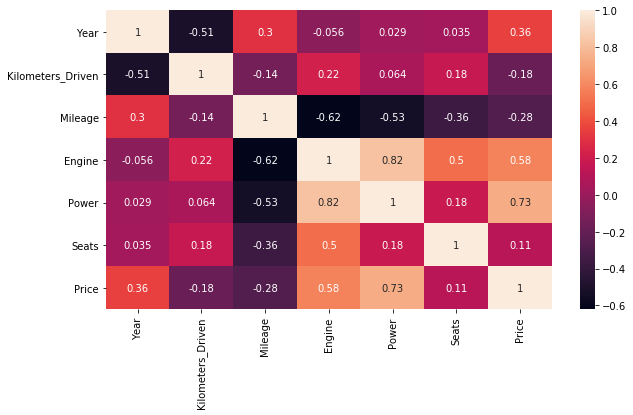

In [72]:
#correlation between the columns is described using a heat map

correlation = Car_Dataset.corr()
plt.figure(figsize = (10,5.5))
sns.heatmap(data = correlation,annot = True)


From the above heatmap, we could infer that "Engine","Year" and "Power" has a positive correlation with Price of the car. "Mileage" and "Kilometers_Driven" has a negative correlation with the price of the car


Text(0.5, 0, 'Price')

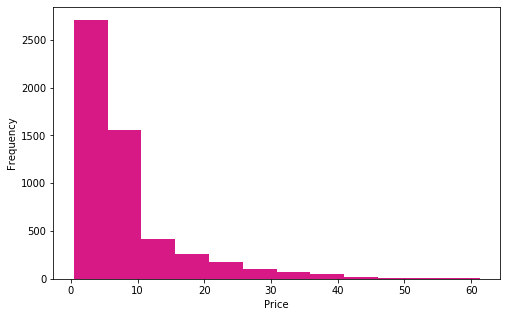

In [73]:
#frequency of prices

plt.figure(figsize = (8,5))
plt.hist(Car_Dataset['Price'],bins = 12,color = '#D71985')
plt.ylabel('Frequency')
plt.xlabel('Price')

The histogram is left skewed and it is clear from the above plot that more than 75% of the used cars have a price amount less than 10Lakhs (ie) (65% have the price amount in the range of 0Lakhs to 5Lakhs and 35% have the price amount in the range of 5Lakhs to 10Lakhs) 

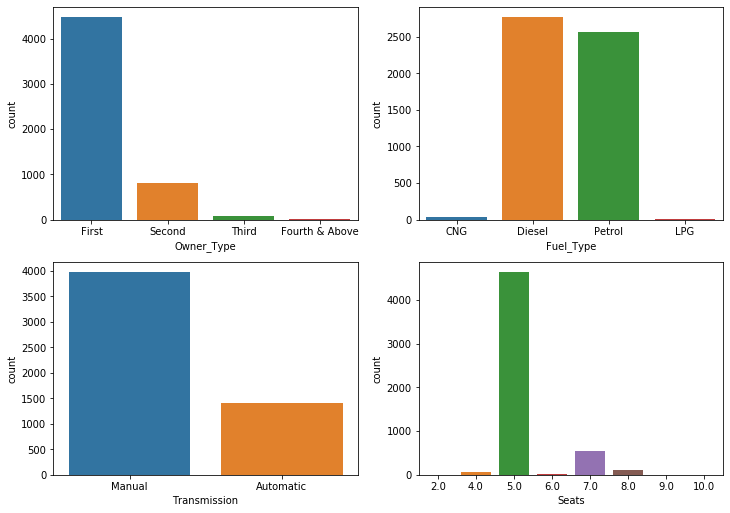

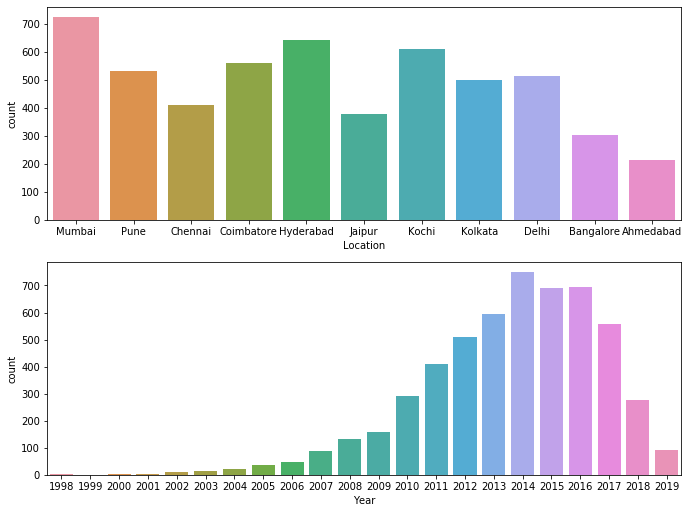

In [74]:
#No of cars in each Category

plt.figure(figsize=(12,18))
plt.subplot(421)
sns.countplot(x = 'Owner_Type',data = Car_Dataset)
plt.subplot(422)
sns.countplot(x = 'Fuel_Type',data = Car_Dataset)
plt.subplot(423)
sns.countplot(x = 'Transmission',data = Car_Dataset)
plt.subplot(424)
sns.countplot(x = 'Seats',data = Car_Dataset)
plt.figure(figsize = (25,18))
plt.subplot(425)
sns.countplot(x = 'Location',data = Car_Dataset)
plt.subplot(427)
sns.countplot(x = 'Year',data = Car_Dataset)


From the above plots,
1. Most(75%) of the used cars are of owner type as FirstHand and very small portion of the cars are with owner type fourth or      above.
2. Approximate equal proprtion of used cars are with the fule type of diesel and petrol.A very small proportion of aproximately    4% to 5% cars of fuel type with LPG or CNG.
3. 70% of the cars are manual and 30% are automatic.
4. Majority(nearly 80%) of the cars are 5 seaters.
5. Approximately equal proportion of cars are present in all locations.
6. The countplot is slightly right skewed when year in kept in account with majority if used cars within the period of 2011 to    2017.

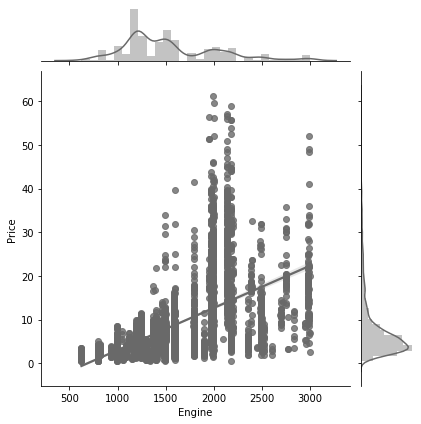

In [75]:
#Price VS Engine

sns.jointplot(x = Car_Dataset['Engine'],y = Car_Dataset['Price'] , kind = 'reg',color = '#696969')

From the scatter plot, we could infer that there is positive correlation between Engine Capacity and Price and when the capacity is nearly 2000, the price has its highest value. From the Histogram, we could infer that most of the cars have an engine capacity in the range of 1000CC to 1500CC. 

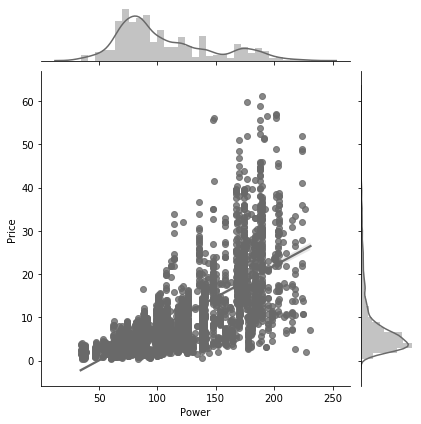

In [76]:
#Power VS Price

sns.jointplot(x = Car_Dataset['Power'],y = Car_Dataset['Price'] , kind = 'reg',color = '#696969')

From the scatter plot, we could infer that there is a positive correlation between Power of the engine and Price and when the power is 150bhp and higher, the price reaches its highest value. From the histogram, most of the cars in the dataset have an engine power between 50bhp to 100bhp.

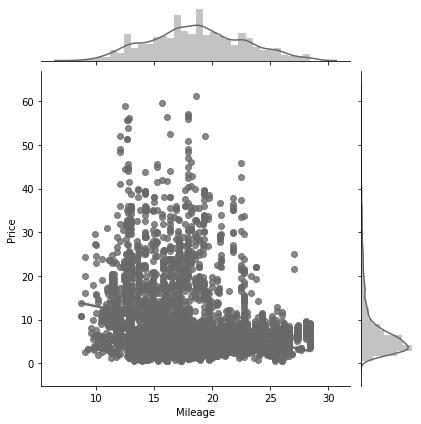

In [77]:
#Mileage VS Price

sns.jointplot(x = Car_Dataset['Mileage'],y = Car_Dataset['Price'] , kind = 'reg',color = '#696969')

From the scatter plot, we infer that there is a negative correlation between Mileage and Price. From the histogram, most of the cars are with the mileage between 15kmpl and 20kmpl.

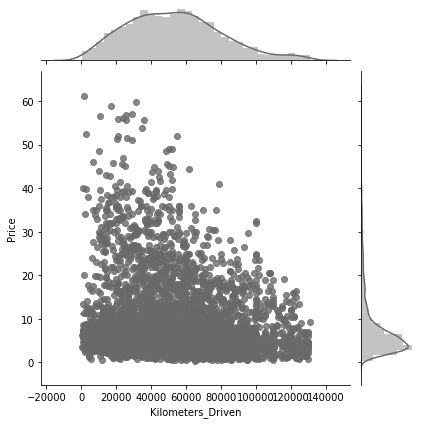

In [78]:
#Kilometers_Driven VS Price

sns.jointplot(x = Car_Dataset['Kilometers_Driven'],y = Car_Dataset['Price'] , kind = 'reg',color = '#696969')

From the scatter plot, there is negative correlation between Kilometers Driven and Price. From the histogram, most of the cars are with the Kilometers Driven in a range of 20000km to 80000km.

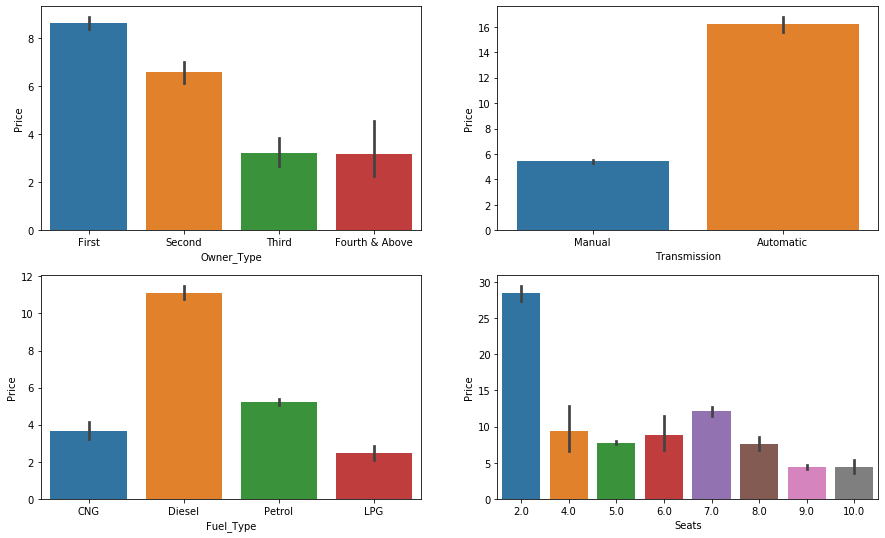

In [79]:
#Categorical Variables VS Price

plt.figure(figsize = (15,14))
plt.subplot(321)
sns.barplot(x = "Owner_Type",y = "Price", data = Car_Dataset)
plt.subplot(322)
sns.barplot(x = "Transmission",y = "Price", data = Car_Dataset)
plt.subplot(323)
sns.barplot(x = "Fuel_Type",y = "Price", data = Car_Dataset)
plt.subplot(324)
sns.barplot(x = "Seats",y = "Price", data = Car_Dataset)

From the above plots,
1. The mean value of prices with Owner Type as First is higher when compared to others. The mean price is almost equal when the Owner type is Third and above.
2. The mean price for cars which are Manual is within a range of 4Lakhs to 6Lakhs. On the otherhand for those which are Automatic it is approximately 16Lakhs.
3. Taking into account the fuel type, the cars which run on diesel has the highest mean value for price followed by petrol,CNG and LPG
4. Two seater cars have the highest mean price. Others have almost equal mean price value.

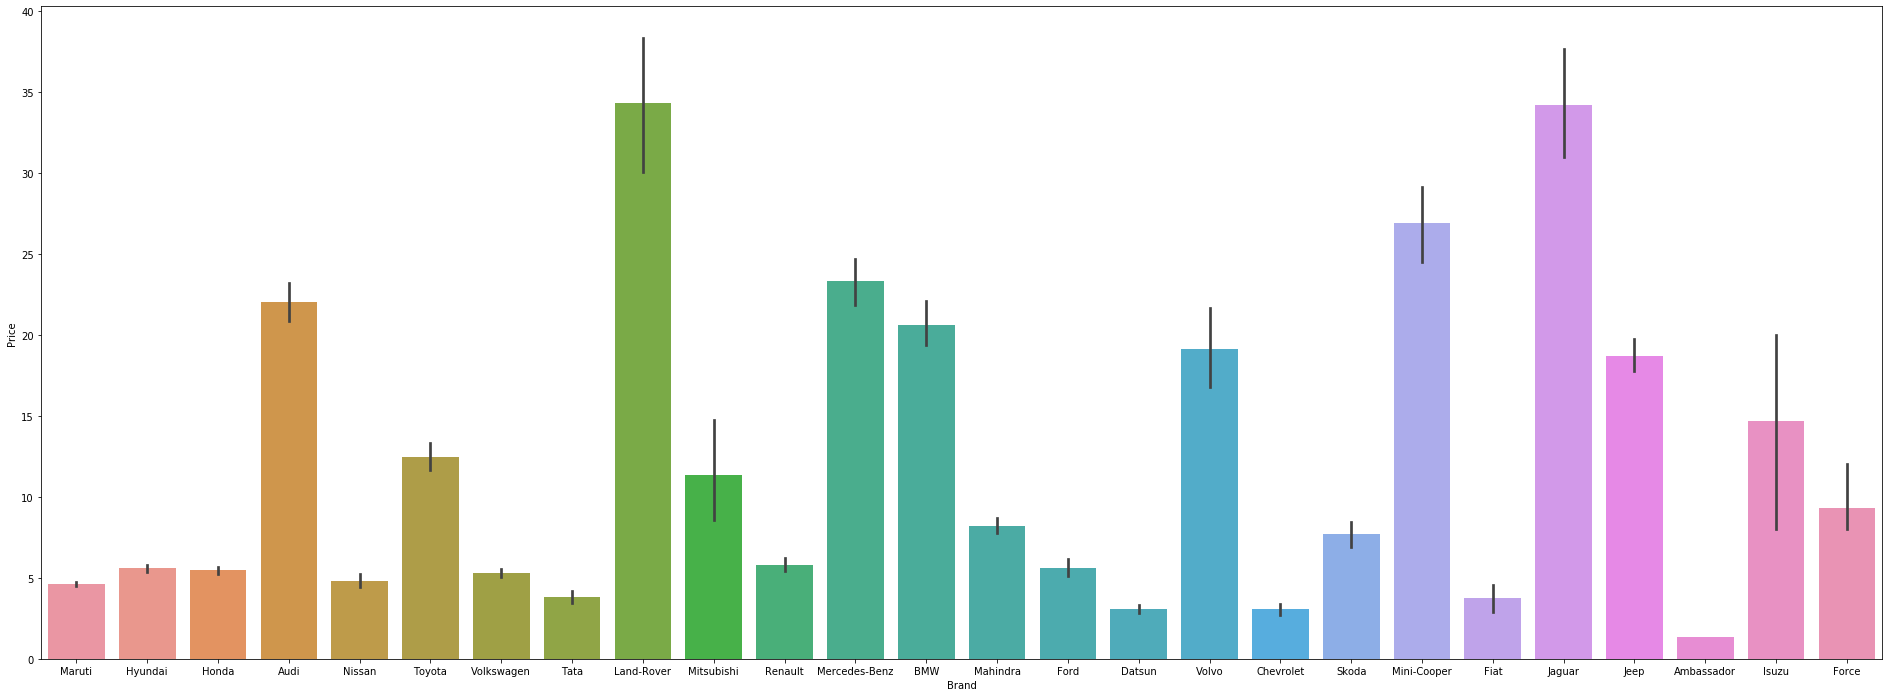

In [80]:
#Creating a new column which indicates the brand of the car and visualizing Brand Vs Price

Car_Dataset['Name'] = Car_Dataset['Name'].replace('ISUZU','Isuzu',regex = True).replace('Land Rover','Land-Rover',regex = True).replace('Mini','Mini-Cooper',regex = True)
Car_Dataset['Brand'] = Car_Dataset['Name'].str.split().str[0].str.strip()
plt.figure(figsize = (33,12))
sns.barplot(x = "Brand",y = "Price", data = Car_Dataset)

When the brand of the cars is taken into account, the mean price for Land-Rover and Jaguar is approximately equal and are the highest followed by Mini-Cooper and Mercedes-benz. The mean price for Ambassader is the lowest.

# Handling Categorical Variables using Label Encoding

In [81]:
#import LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [82]:
#LabelEncoder for encoding categorical variable "Owner_Type"

encoder = LabelEncoder()
lst = ['First','Second','Third','Fourth & Above']
encoder.fit(lst)
Car_Dataset['Owner_Type'] = encoder.transform(Car_Dataset['Owner_Type'])    

The Encoder has encoded the following values for the categorical varible "Owner_Type"                                           
      (i)  "First" as 0                                                            
      (ii) "Second" as 2                                       
      (iii)"Third" as 3                                  
      (iv) "Fourth & Above" as 1                                

In [83]:
#LabelEncoder for encoding categorical     variable "Fuel_Type"

encoder = LabelEncoder()
lst = ['CNG','LPG','Diesel','Petrol']
encoder.fit(lst)
Car_Dataset['Fuel_Type'] = encoder.transform(Car_Dataset['Fuel_Type'])

The Encoder has encoded the following values for the categorical varible "Fuel_Type"                          
(i) "CNG" as 0                                                
(ii) "Diesel" as 1                             
(iii)"LPG" as 2                                          
(iv) "Petrol" as 3                            

In [84]:
#LabelEncoder for encoding categorical variable "Transmission"

encoder = LabelEncoder()
lst = ['Automatic','Manual']
encoder.fit(lst)
Car_Dataset['Transmission'] = encoder.transform(Car_Dataset['Transmission'])    

The Encoder has encoded the following values for  the categorical variable "Transmission"                            
(i) "Automatic" as 0                                  
(ii) "Manual" as 1

# Data Scaling 

In [85]:
#import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [86]:
#Scaling for Kilometers_Driven

scaler = MinMaxScaler()
km_driven = Car_Dataset['Kilometers_Driven']
km_driven = np.array(km_driven)
km_driven = km_driven.reshape(-1,1)
Scaled_Value = scaler.fit_transform(km_driven)
sca = np.array(42000)
sca = sca.reshape(-1,1)
scaled = scaler.transform(sca)
Car_Dataset['Kilometers_Driven'] = Scaled_Value
print(scaled)

[[0.32023672]]



### Visualizing the Dataset

In [87]:
#the dataset after Data Clensing, Data Scaling, Encoding 

shape = Car_Dataset.shape
print('No of rows in the Dataset')
print(shape[0])
print('No of columns in the Dataset')
print(shape[1])
Car_Dataset.head(10)

No of rows in the Dataset
5385
No of columns in the Dataset
13


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.549912,0,1,0,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,0.312581,1,1,0,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,0.350860,3,1,0,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,0.664750,1,1,0,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,0.310054,1,0,2,15.20,1968.0,140.80,5.0,17.74,Audi
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,0.572880,2,1,0,21.10,814.0,55.20,5.0,2.35,Hyundai
6,Nissan Micra Diesel XV,Jaipur,2013,0.664742,1,1,0,23.08,1461.0,63.10,5.0,3.50,Nissan
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,0.274302,1,0,0,11.36,2755.0,171.50,8.0,17.50,Toyota
8,Volkswagen Vento Diesel Comfortline,Pune,2013,0.491958,1,1,0,20.54,1598.0,103.60,5.0,5.20,Volkswagen
9,Tata Indica Vista Quadrajet LS,Chennai,2012,0.503457,1,1,2,22.30,1248.0,74.00,5.0,1.95,Tata


# Train Test Split

In [88]:
# importing the test_train_split

from sklearn.model_selection import train_test_split

In [89]:
#droping the columns that aren't required to train the data

col = ['Name','Location','Price','Brand']        #columns to be dropped
X = Car_Dataset.drop(col,axis = 1)               #storing the features from Car_Dataset to a new Dataframe
y = Car_Dataset.loc[:,'Price']                   #storing the label 'Price' into a new Dataframe
print('Features considered for training the model :')
print(X.columns.values)
print('The label to be predicted : Price ')

Features considered for training the model :
['Year' 'Kilometers_Driven' 'Fuel_Type' 'Transmission' 'Owner_Type'
 'Mileage' 'Engine' 'Power' 'Seats']
The label to be predicted : Price 


In [90]:
#spliting the data set into train set and test set

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0) #performing the train test split 
print('Shape of the Dataframes used to train the model')
print('X_train :{0} y_train :{1}'.format(X_train.shape,y_train.shape))
print('Shape of the Dataframes used to test the trained model')
print('X_test :{0} y_test :{1}'.format(X_test.shape,y_test.shape))

Shape of the Dataframes used to train the model
X_train :(4038, 9) y_train :(4038,)
Shape of the Dataframes used to test the trained model
X_test :(1347, 9) y_test :(1347,)


# Machine Learning Algorithms

#### K-NEAREST NEIGHBOUR REGRESSOR

In [91]:
#importing KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [92]:
#applying KNeighborsRegressor to train the dataset

model_score = {}
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
model_score['KNeighborsRegressor'] = r2_score(y_test,y_predict)
print('Train Score : {0} '.format(knn.score(X_train,y_train)))
print('Test Score(r2 value) : {0}' .format(r2_score(y_test,y_predict)))




Train Score : 0.9215994014007165 
Test Score(r2 value) : 0.8691696746458393


### RANDOM FOREST DESICION TREES

In [93]:
#importing RandomForestRegressor


from sklearn.ensemble import RandomForestRegressor

In [94]:
#applying RandomForestRegressor to train the dataset

randforest = RandomForestRegressor(n_estimators = 15)
randforest.fit(X_train,y_train)
y_predict = randforest.predict(X_test)
model_score['RandomForestRegressor'] = r2_score(y_test,y_predict)
print('Train Score : {0} '.format(randforest.score(X_train,y_train)))
print('Test Score(r2 value) : {0}' .format(r2_score(y_test,y_predict)))

Train Score : 0.9838870163087715 
Test Score(r2 value) : 0.907043508840004


### GRADIENT BOOSTED DECISION TREES

In [95]:
#importing GradienBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

In [96]:
#applying GradientBoostingRegressor to train the dataset


gradboost = GradientBoostingRegressor(learning_rate = 0.1,max_depth = 5,n_estimators = 200)
gradboost.fit(X_train,y_train)
y_predict = gradboost.predict(X_test)
model_score['GradientBoostingRegressor'] = r2_score(y_test,y_predict)
print('Train Score : {0} '.format(gradboost.score(X_train,y_train)))
print('Test Score(r2 value) : {0}' .format(r2_score(y_test,y_predict)))
sh = [[2016 , 0.3202,3 ,2,0, 15.0 ,  814.0 , 55.2, 4.0]]
pr = gradboost.predict(sh)
print(pr)

Train Score : 0.9801690344248241 
Test Score(r2 value) : 0.9272420683679077
[2.68799646]


### RIDGE REGRESSION

In [97]:
#importing RidgeRegression

from sklearn.linear_model import Ridge


In [98]:
#applying RidgeRegression to train the dataset

ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
y_predict = ridge.predict(X_test)
model_score['RidgeRegression'] = r2_score(y_test,y_predict)
print('Train Score : {0} '.format(ridge.score(X_train,y_train)))
print('Test Score(r2 value) : {0}' .format(r2_score(y_test,y_predict)))

Train Score : 0.6913357390894781 
Test Score(r2 value) : 0.7055901945892731


### POLYNOMIAL FEATURES WITH RIDGE REGRESSION

In [99]:
#importing PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures

In [100]:
#applying polynomial features with ridge regression to train the dataset

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
X_train_poly,X_test_poly,y_train_poly,y_test_poly = train_test_split(X_poly,y,random_state = 0)
ridge = Ridge(alpha = 15)
ridge.fit(X_train_poly,y_train_poly)
y_predict = ridge.predict(X_test_poly)
model_score['PolynomialWithRegression'] = r2_score(y_test_poly,y_predict)
print('Train Score : {0} '.format(ridge.score(X_train_poly,y_train_poly)))
print('Test Score(r2 value) : {0}' .format(r2_score(y_test_poly,y_predict)))

Train Score : 0.8811762296741464 
Test Score(r2 value) : 0.8750564691870482


C:\applications\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.61913e-23): result may not be accurate.
  overwrite_a=True).T


# Error Metrices

### r2_score is used to calculate the error metrix

In [101]:
#the r2_score value calculated for the different models that are trained

model_score

{'KNeighborsRegressor': 0.8691696746458393,
 'RandomForestRegressor': 0.907043508840004,
 'GradientBoostingRegressor': 0.9272420683679077,
 'RidgeRegression': 0.7055901945892731,
 'PolynomialWithRegression': 0.8750564691870482}

In [102]:
#choosing the best model for the given dataset based on the r2_score

Best_Model = max(model_score, key=model_score.get)
print('The BEST Model that fits the given dataset is the one which is trained using {0}'.format(Best_Model))

The BEST Model that fits the given dataset is the one which is trained using GradientBoostingRegressor
